In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score
from random_forest import RandomForest
import joblib

In [7]:
loan=pd.read_csv('./data/loan.csv')

In [8]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
loan.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4688,4689,4,Graduate,No,103360,14352026,14,836,9982626,5933475,4,324,Approved
2104,2105,5,Not Graduate,Yes,7700000,15500000,8,407,6500000,9100000,26300000,4600000,Rejected
2016,2017,4,Not Graduate,No,5800000,14200000,20,535,10200000,4000000,21100000,3400000,Rejected
1185,1186,5,Graduate,No,7400000,21000000,4,561,21300000,3800000,26400000,3900000,Approved
713,714,1,Graduate,Yes,4400000,14700000,8,894,11400000,6300000,9400000,2400000,Approved


In [10]:
loan.shape

(5500, 13)

In [11]:
loan = loan.rename(columns={
    ' no_of_dependents':'no_of_dependents',
    ' education':'education',
    ' self_employed': 'self_employed',
    ' income_annum':'income_annum',
    ' loan_amount':'loan_amount', 
    ' loan_term':'loan_term', 
    ' cibil_score': 'cibil_score',
    ' residential_assets_value': 'residential_assets_value', 
    ' commercial_assets_value':'commercial_assets_value', 
    ' luxury_assets_value':'luxury_assets_value',
    ' bank_asset_value':'bank_asset_value',
    ' loan_status':'loan_status'
})

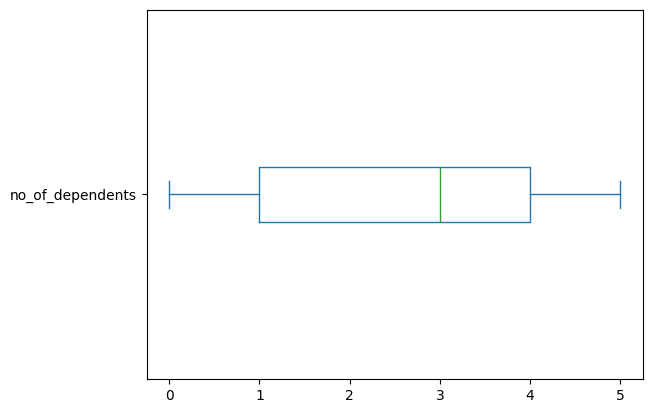

<Figure size 500x1000 with 0 Axes>

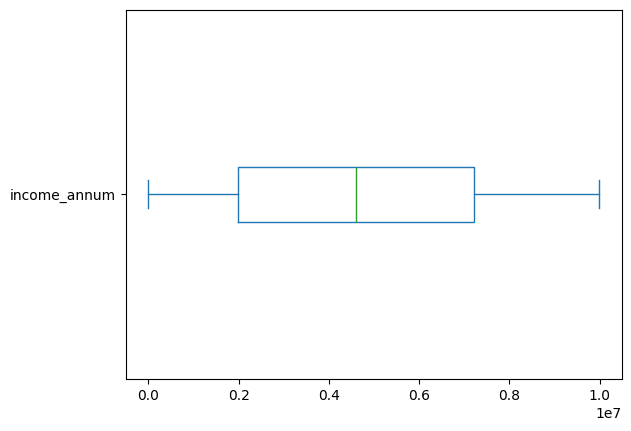

<Figure size 500x1000 with 0 Axes>

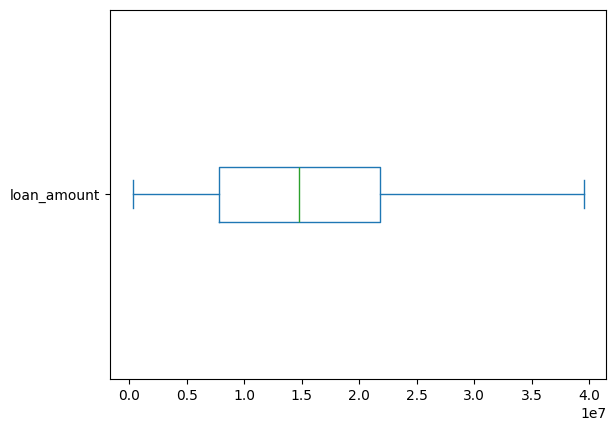

<Figure size 500x1000 with 0 Axes>

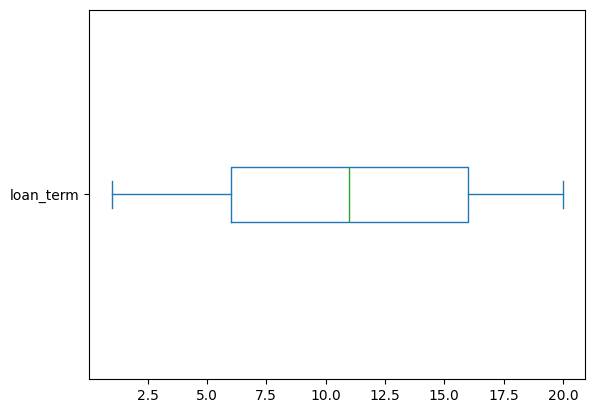

<Figure size 500x1000 with 0 Axes>

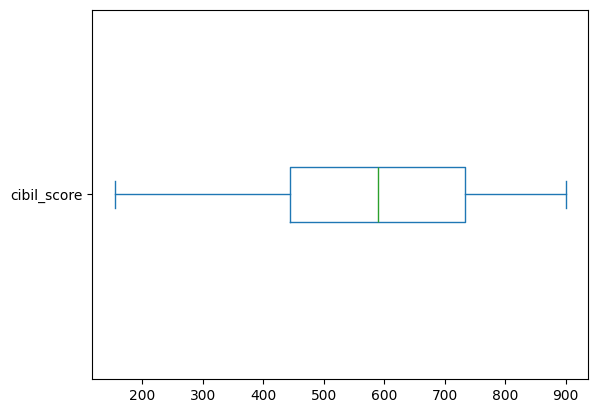

<Figure size 500x1000 with 0 Axes>

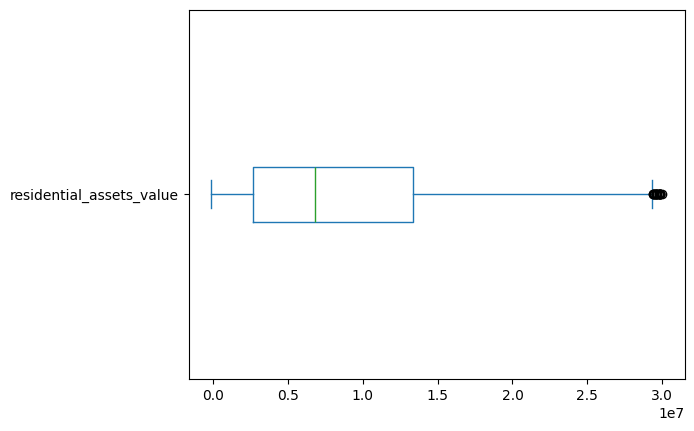

<Figure size 500x1000 with 0 Axes>

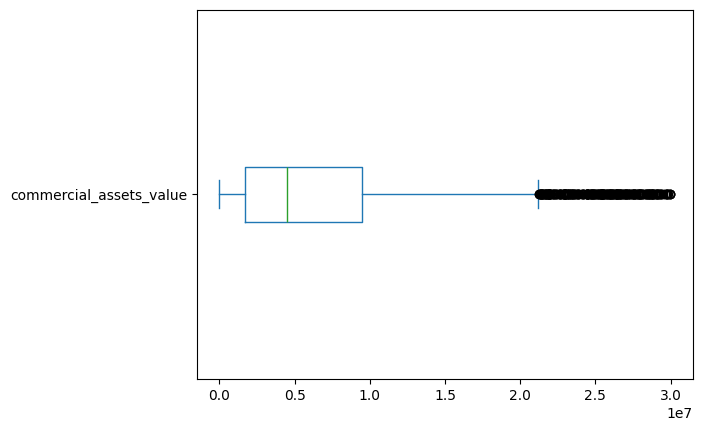

<Figure size 500x1000 with 0 Axes>

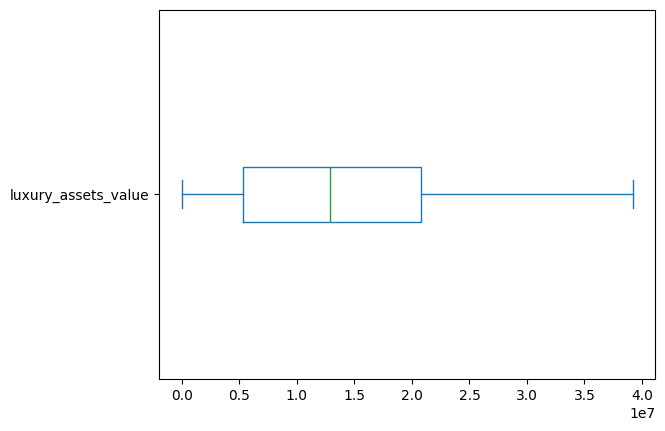

<Figure size 500x1000 with 0 Axes>

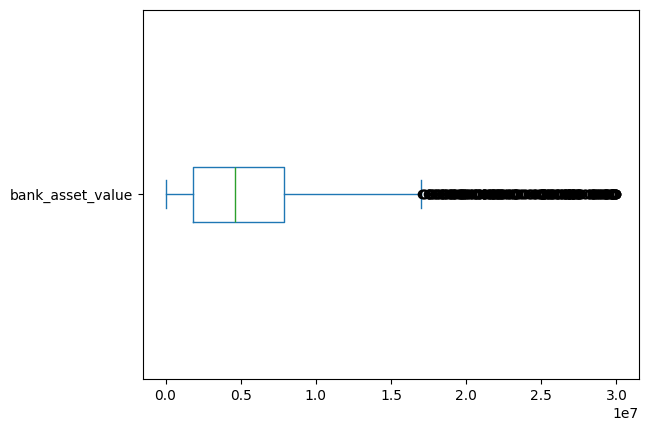

<Figure size 500x1000 with 0 Axes>

In [12]:
col=['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
for co in col:
    loan[co].plot.box(vert=False)
    plt.figure(figsize=(5, 10))
    plt.tight_layout()
    plt.show()

In [13]:
loan.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [14]:
loan.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [15]:
loan.select_dtypes(include='number')

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...
5495,5496,0,7956688,15917565,14,550,16415376,15725535,16843083,27270209
5496,5497,2,4575837,26048546,8,443,21631703,3893193,88780,22283342
5497,5498,3,2733706,26463499,14,650,19654884,27983578,7397228,28377685
5498,5499,1,6594645,1708175,14,697,22221624,5681868,2695145,2930299


In [16]:
col=['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']

In [17]:
for i in range(1):
    for co in col:
        Q1 = loan[co].quantile(0.25)
        Q3 = loan[co].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        loan = loan[(loan[co] >= lower_bound) & (loan[co] <= upper_bound)]

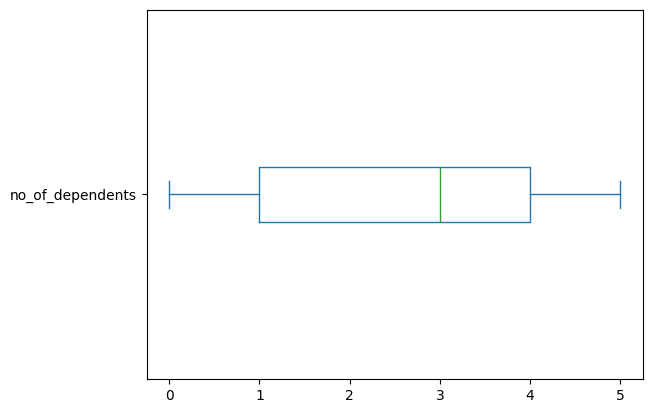

<Figure size 500x1000 with 0 Axes>

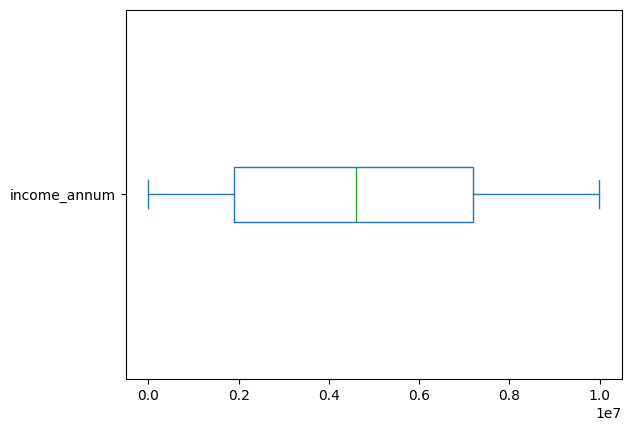

<Figure size 500x1000 with 0 Axes>

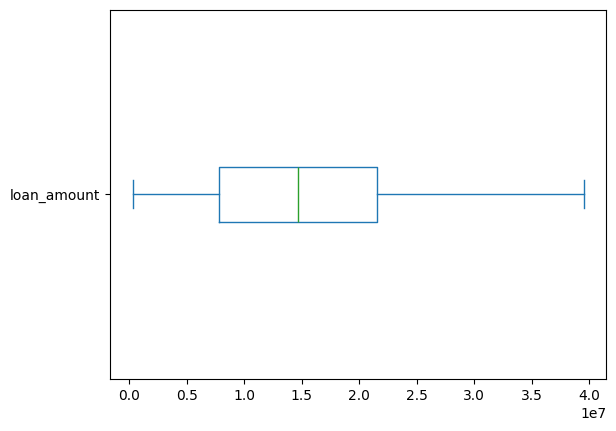

<Figure size 500x1000 with 0 Axes>

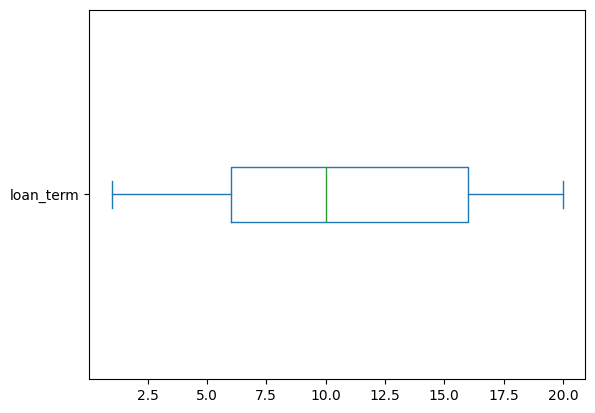

<Figure size 500x1000 with 0 Axes>

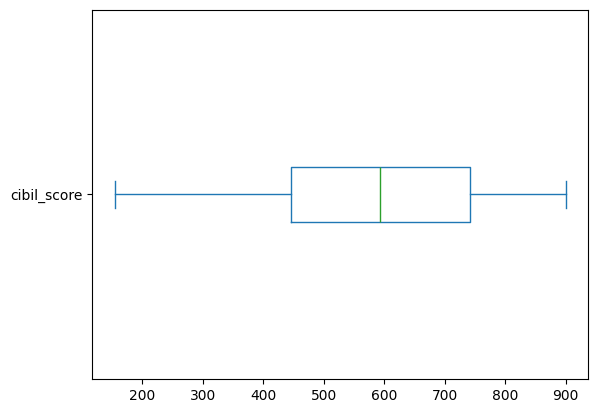

<Figure size 500x1000 with 0 Axes>

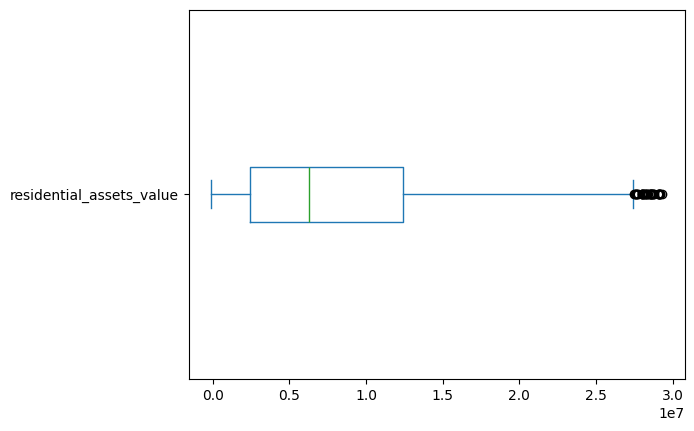

<Figure size 500x1000 with 0 Axes>

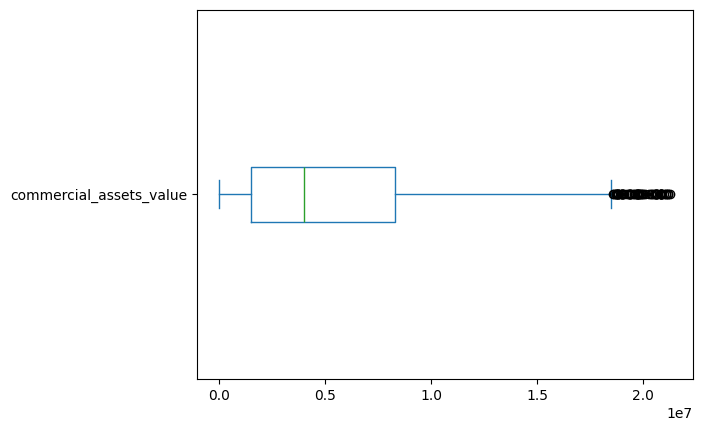

<Figure size 500x1000 with 0 Axes>

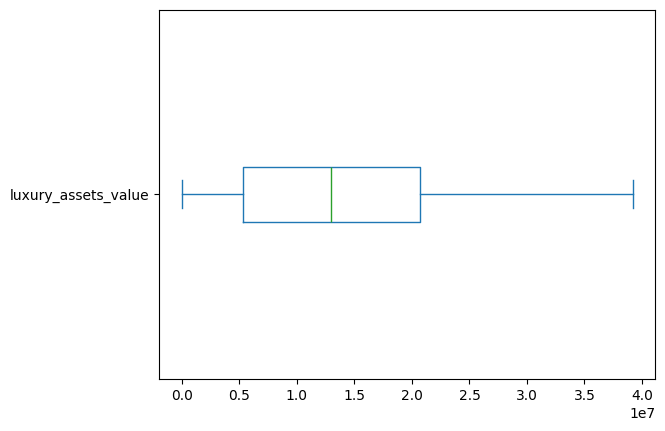

<Figure size 500x1000 with 0 Axes>

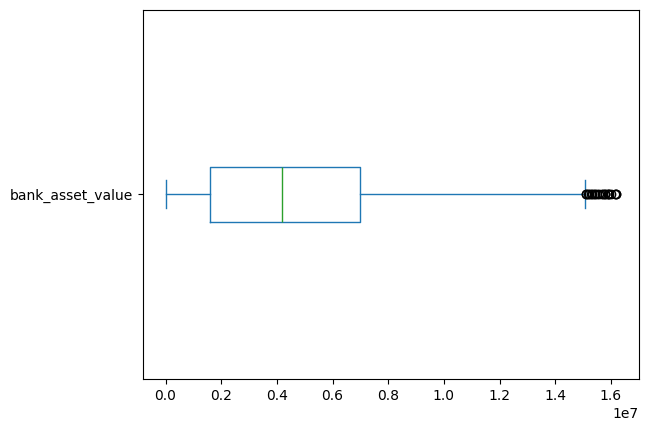

<Figure size 500x1000 with 0 Axes>

In [18]:
for co in col:
    loan[co].plot.box(vert=False)
    plt.figure(figsize=(5, 10))
    plt.tight_layout()
    plt.show()

In [19]:
loan.shape

(4998, 13)

In [20]:
loan['education'] = loan['education'].map({' Graduate': 1, ' Not Graduate': 0,'Graduate':1,'Not Graduate':0})

In [21]:
loan['self_employed'] = loan['self_employed'].map({' Yes': 1, ' No': 0,'Yes': 1,'No': 0})

In [22]:
loan['loan_status'] = loan['loan_status'].map({' Approved': 1, ' Rejected': 0,'Approved': 1, 'Rejected': 0})

In [23]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [24]:
loan.corr()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.038977,0.024943,-0.024414,-0.187639,0.006119,0.004127,-0.035584,0.163180,0.159930,-0.209319,-0.089804,-0.048038
no_of_dependents,0.038977,1.000000,0.010962,-0.008370,-0.025891,0.004457,-0.008376,-0.014803,0.011156,0.016461,-0.027477,-0.025707,-0.026488
education,0.024943,0.010962,1.000000,-0.025493,-0.000213,0.010326,-0.006403,-0.002717,0.005947,-0.004467,-0.001476,-0.003036,-0.001789
self_employed,-0.024414,-0.008370,-0.025493,1.000000,0.008123,0.000888,0.008910,-0.003899,0.004580,-0.020377,0.007479,-0.007743,0.000124
income_annum,-0.187639,-0.025891,-0.000213,0.008123,1.000000,0.763907,0.015891,0.002318,0.442804,0.429894,0.904749,0.808423,0.020768
loan_amount,0.006119,0.004457,0.010326,0.000888,0.763907,1.000000,0.006868,-0.007350,0.495207,0.548103,0.710477,0.629996,0.017486
loan_term,0.004127,-0.008376,-0.006403,0.008910,0.015891,0.006868,1.000000,-0.000385,0.005558,-0.014237,0.019378,0.026344,-0.093121
cibil_score,-0.035584,-0.014803,-0.002717,-0.003899,0.002318,-0.007350,-0.000385,1.000000,-0.031908,-0.023733,-0.002095,-0.002846,0.656828
residential_assets_value,0.163180,0.011156,0.005947,0.004580,0.442804,0.495207,0.005558,-0.031908,1.000000,0.372455,0.397842,0.398905,-0.033663
commercial_assets_value,0.159930,0.016461,-0.004467,-0.020377,0.429894,0.548103,-0.014237,-0.023733,0.372455,1.000000,0.390883,0.381746,-0.000338


In [25]:
np.random.seed(42)
random_indices = np.random.permutation(loan.index)
loan = loan.loc[random_indices]

In [26]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
84,85,3,0,1,3000000,8200000,16,713,5300000,5800000,11000000,3400000,1
2470,2471,1,1,1,5100000,11500000,4,747,5000000,8900000,14100000,7000000,1
2803,2804,0,1,0,6000000,23600000,6,776,13800000,2700000,23400000,8800000,1
5445,5446,5,0,1,2734805,7637640,2,692,5908553,1717355,20414804,2933811,1
5277,5278,3,0,0,6723754,6277420,16,559,29163760,10710881,28107874,15487103,1


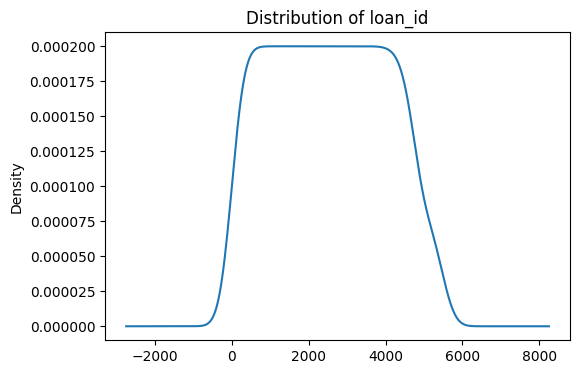

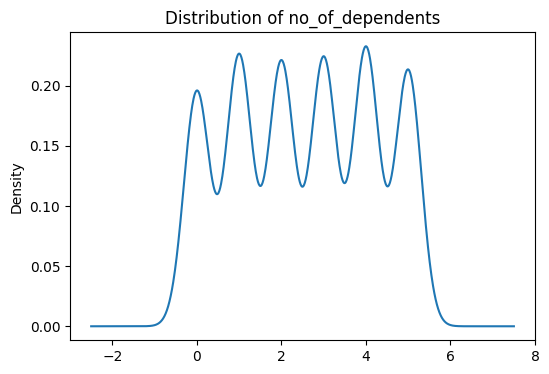

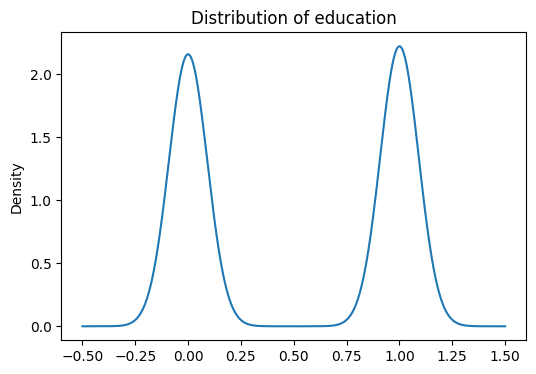

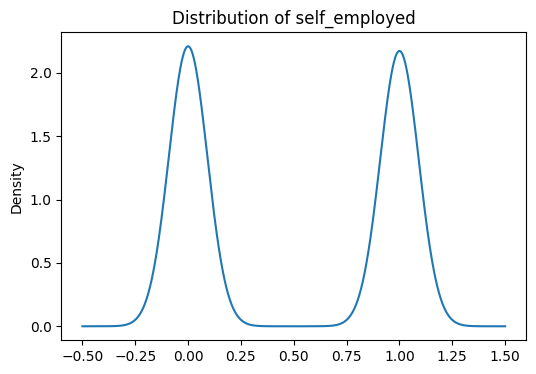

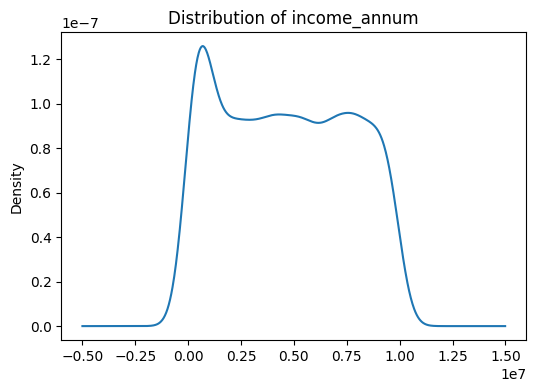

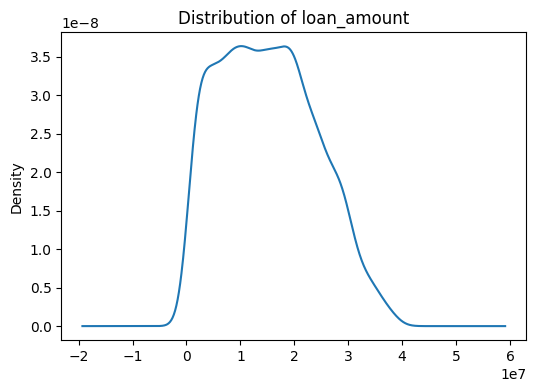

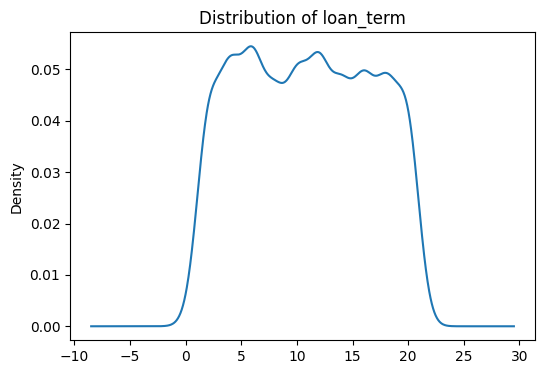

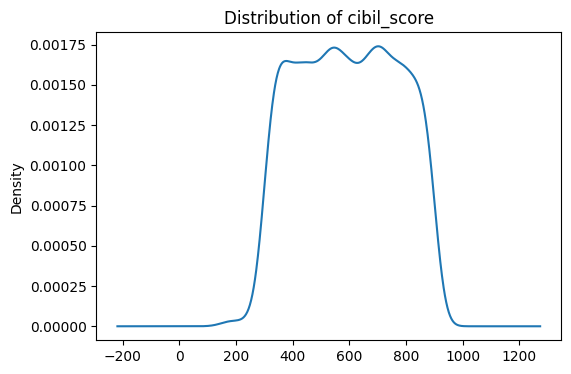

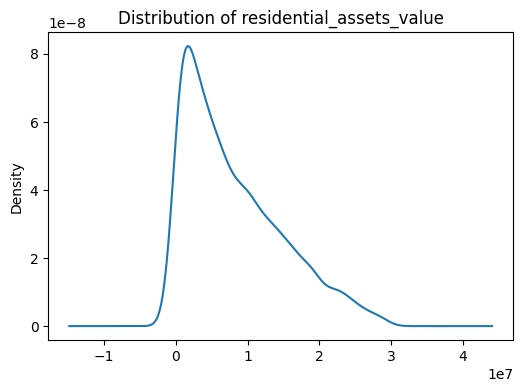

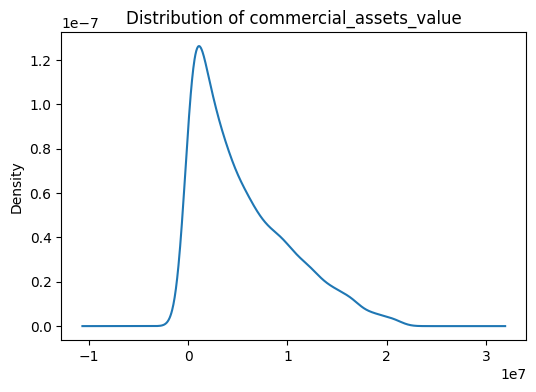

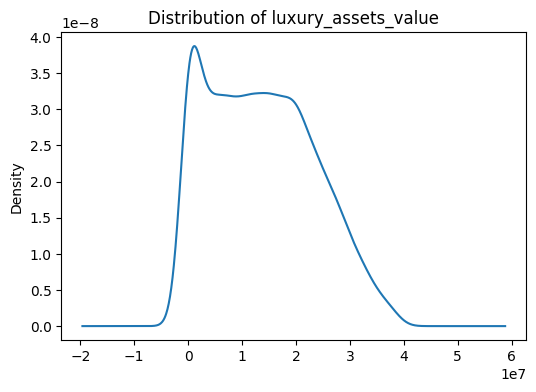

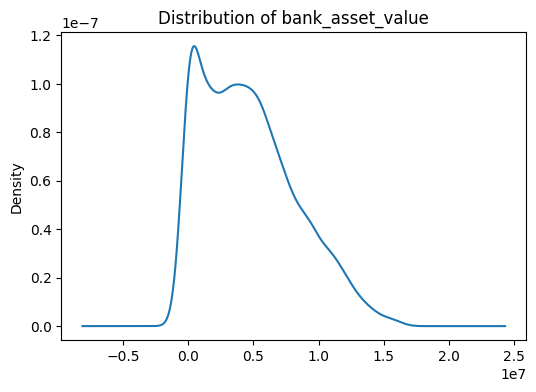

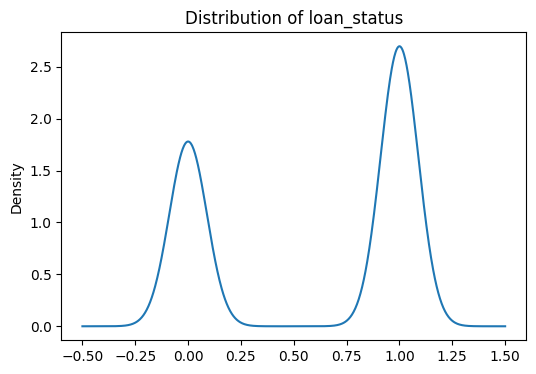

In [27]:
for column in loan.columns:
    loan[column].plot(kind='density', figsize=(6, 4))
    plt.title(f'Distribution of {column}')
    plt.show()

In [28]:
X = loan.drop(['loan_status', 'loan_amount', 'loan_id'], axis=1).values
y = loan['loan_status'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(np.count_nonzero(y_train== 0))

1572


In [31]:
rf_approval = RandomForest(n_trees=19,max_depth=15,random_state=42)

In [32]:
rf_approval.fit(X_train, y_train)

In [33]:
y_pred= rf_approval.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.86700


In [39]:
import seaborn as sns

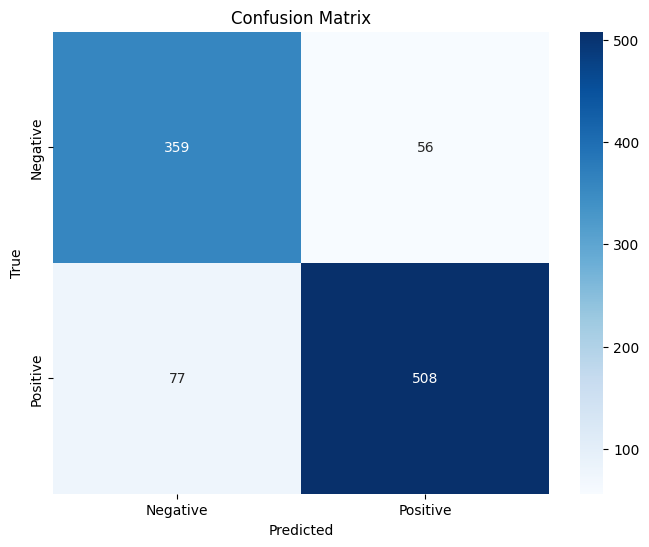

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  # Assuming y_test is your true labels for the test data

# Define labels for the confusion matrix
labels = ['Negative', 'Positive']  # Modify labels as per your problem

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
joblib.dump(rf_approval, "models/approval.joblib")

['models/approval.joblib']

In [42]:
amount=loan[loan['loan_status']==1]

In [43]:
amount.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
84,85,3,0,1,3000000,8200000,16,713,5300000,5800000,11000000,3400000,1
2470,2471,1,1,1,5100000,11500000,4,747,5000000,8900000,14100000,7000000,1
2803,2804,0,1,0,6000000,23600000,6,776,13800000,2700000,23400000,8800000,1
5445,5446,5,0,1,2734805,7637640,2,692,5908553,1717355,20414804,2933811,1
5277,5278,3,0,0,6723754,6277420,16,559,29163760,10710881,28107874,15487103,1


In [44]:
amount = amount.drop(['loan_status','loan_id'], axis=1)

In [45]:
coll=['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value',
'bank_asset_value']

In [46]:
amount.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,-0.002315,0.001707,-0.025860,-0.002563,-0.009600,-0.000604,0.011157,-0.001777,-0.025059,-0.021734
education,-0.002315,1.000000,-0.024140,-0.004011,-0.000613,-0.013170,-0.022203,0.006765,-0.000843,-0.002066,-0.010081
self_employed,0.001707,-0.024140,1.000000,-0.002351,-0.008207,0.022776,0.006420,-0.006632,-0.034627,-0.002488,-0.017643
income_annum,-0.025860,-0.004011,-0.002351,1.000000,0.795620,0.021652,0.076140,0.466405,0.459656,0.908392,0.812912
loan_amount,-0.002563,-0.000613,-0.008207,0.795620,1.000000,0.006586,-0.042907,0.517040,0.578532,0.743124,0.668355
loan_term,-0.009600,-0.013170,0.022776,0.021652,0.006586,1.000000,0.146610,0.019906,0.018783,0.029864,0.036222
cibil_score,-0.000604,-0.022203,0.006420,0.076140,-0.042907,0.146610,1.000000,-0.058122,-0.083808,0.070311,0.034286
residential_assets_value,0.011157,0.006765,-0.006632,0.466405,0.517040,0.019906,-0.058122,1.000000,0.390550,0.433919,0.431872
commercial_assets_value,-0.001777,-0.000843,-0.034627,0.459656,0.578532,0.018783,-0.083808,0.390550,1.000000,0.411319,0.417160
luxury_assets_value,-0.025059,-0.002066,-0.002488,0.908392,0.743124,0.029864,0.070311,0.433919,0.411319,1.000000,0.765159


In [47]:
amount.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3011.000000,3011.000000,3011.000000,3.011000e+03,3.011000e+03,3011.000000,3011.000000,3.011000e+03,3.011000e+03,3.011000e+03,3.011000e+03
mean,2.505480,0.506476,0.495849,4.675446e+06,1.524886e+07,10.451345,687.472933,7.912144e+06,5.406361e+06,1.388239e+07,4.721288e+06
std,1.680715,0.500041,0.500066,2.979002e+06,9.114012e+06,5.867123,139.064653,6.768030e+06,4.766905e+06,9.661716e+06,3.553354e+06
min,0.000000,0.000000,0.000000,5.100000e+01,3.000000e+05,1.000000,160.000000,-1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,0.000000,0.000000,2.000000e+06,7.600000e+06,4.000000,601.000000,2.400000e+06,1.500000e+06,5.504582e+06,1.700000e+06
50%,3.000000,1.000000,0.000000,4.600000e+06,1.470000e+07,10.000000,702.000000,6.000000e+06,4.000000e+06,1.320000e+07,4.200000e+06
75%,4.000000,1.000000,1.000000,7.300000e+06,2.220000e+07,16.000000,797.000000,1.210000e+07,8.414620e+06,2.090000e+07,7.100000e+06
max,5.000000,1.000000,1.000000,9.979276e+06,3.950000e+07,20.000000,900.000000,2.931934e+07,2.127844e+07,3.860000e+07,1.618429e+07


In [48]:
A = amount.drop('loan_amount', axis=1)
b = amount['loan_amount']

In [49]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [50]:
rf_amount = RandomForestRegressor(random_state=42)
rf_amount.fit(A_train, b_train)

RandomForestRegressor(random_state=42)

In [51]:
predictions = rf_amount.predict(A_test)

In [52]:
joblib.dump(rf_amount, "models/amount.joblib")

['models/amount.joblib']

In [53]:
r2 = r2_score(b_test, predictions)
print(r2)

0.8202734443431631


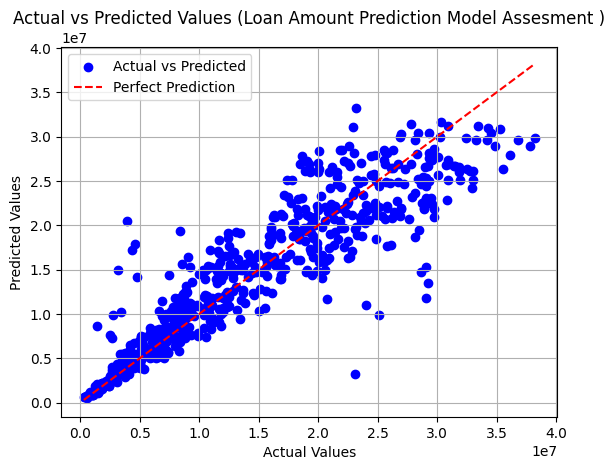

In [55]:
plt.scatter(b_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(b_test), max(b_test)], [min(b_test), max(b_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Loan Amount Prediction Model Assesment )')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()